## Model which will predict angle using Bandgap provided

In [23]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# === Load updated dataset ===
df = pd.read_csv('bandgap_with_only_width.csv')  # update path to your new file

# === Feature and target separation ===
X = df[['Bandgap_Number', 'Width']]  # NEW features
y = df['Angle']

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Train model ===
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Predictions ===
y_pred = model.predict(X_test)

# === Metrics ===
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# === Save the model ===
joblib.dump(model, 'xgb_angle_model_from_width.pkl')

Mean Squared Error (MSE): 213.9265
R² Score: -0.0871


['xgb_angle_model_from_width.pkl']

Plots

Text(0.5, 1.0, 'Actual vs Predicted Angle')

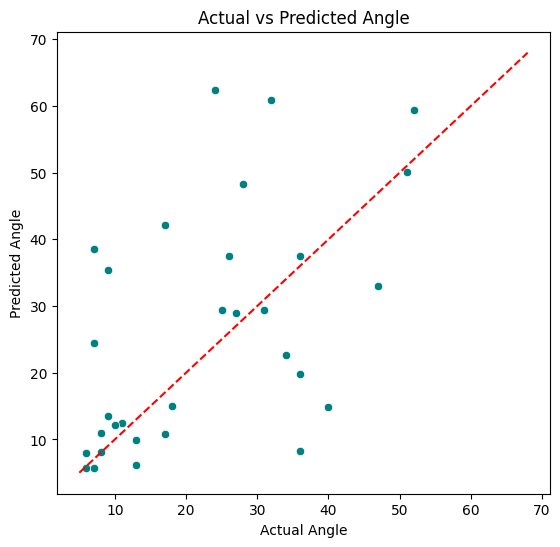

In [17]:
plt.figure(figsize=(14, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Angle")
plt.ylabel("Predicted Angle")
plt.title("Actual vs Predicted Angle")

Residuals

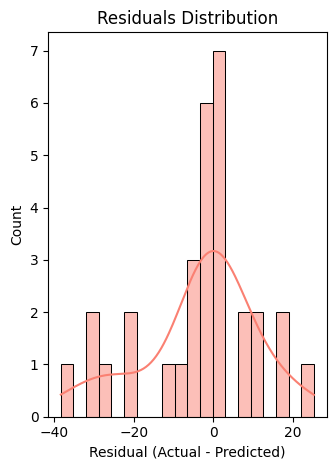

Predicted Angle for input [2.   0.15] → 5.7746


In [24]:
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='salmon')
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("angle_from_width_prediction_results.png")
plt.show()

# === Example: Predict from new input ===
# Replace this with your test value
new_input = np.array([[2.0, 0.15]])  # [Bandgap_Number, Bandgap_Width]
predicted_angle = model.predict(new_input)

print(f"Predicted Angle for input {new_input[0]} → {predicted_angle[0]:.4f}")

In [27]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# === Load dataset ===
df = pd.read_csv('bandgap_with_only_width.csv')  # change path as needed

# === Feature and target separation ===
X = df['Width']   
y = df['Angle']

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Train XGBoost model ===
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Predict and evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# === Save the model ===
joblib.dump(model, 'xgb_model_width_only.pkl')



Mean Squared Error (MSE): 248.1662
R² Score: -0.2611


['xgb_model_width_only.pkl']

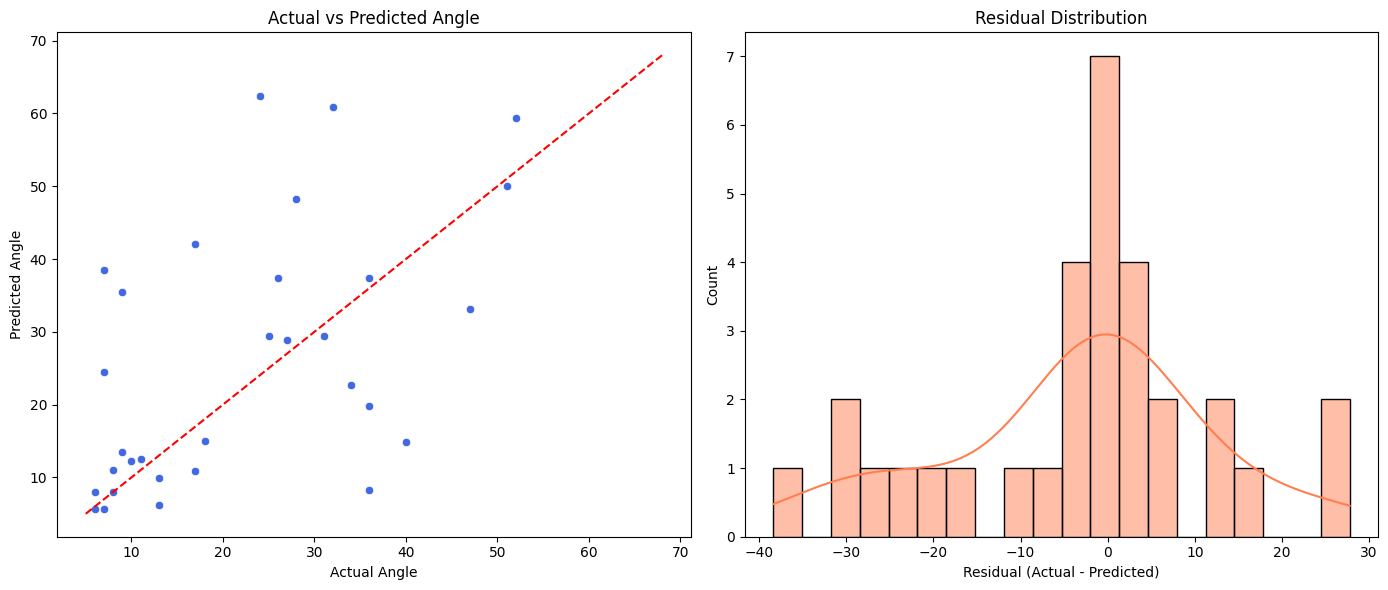

Predicted Angle for Width = 0.12 → 13.4552


In [28]:
# === Plot: Predicted vs Actual ===
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Angle")
plt.ylabel("Predicted Angle")
plt.title("Actual vs Predicted Angle")

# Plot residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='coral')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("angle_from_width_only.png")
plt.show()

# === Predict from new width ===
new_width = np.array([[0.12]])  # e.g., input width 0.12
predicted_angle = model.predict(new_width)
print(f"Predicted Angle for Width = {new_width[0][0]} → {predicted_angle[0]:.4f}")


In [29]:
import joblib
import numpy as np

# Load the trained model (width-only model)
model = joblib.load('xgb_model_width_only.pkl')

# Provide a new input width (you can change this value)
bandgap_width = 0.12

# Prepare input in correct shape
input_data = np.array([[bandgap_width]])

# Predict angle
predicted_angle = model.predict(input_data)

print(f"Predicted Angle for Bandgap Width = {bandgap_width:.3f} → {predicted_angle[0]:.4f}")


Predicted Angle for Bandgap Width = 0.120 → 13.4552


In [33]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# === Step 1: Load the dataset ===
df = pd.read_csv('bandgap_with_only_width.csv')  # Change path as needed

# === Step 2: Use only Bandgap_Width as input ===
X = df['Width']
y = df['Angle']

# === Step 3: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Step 4: Train the XGBoost Regressor ===
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Step 5: Predict and evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"  ➤ Mean Squared Error (MSE): {mse:.4f}")
print(f"  ➤ R² Score: {r2:.4f}\n")

# === Step 6: Save the trained model ===
joblib.dump(model, 'xgb_model_width_only.pkl')
print(" Model saved as 'xgb_model_width_only.pkl'\n")




Model Performance:
  ➤ Mean Squared Error (MSE): 248.1662
  ➤ R² Score: -0.2611

 Model saved as 'xgb_model_width_only.pkl'



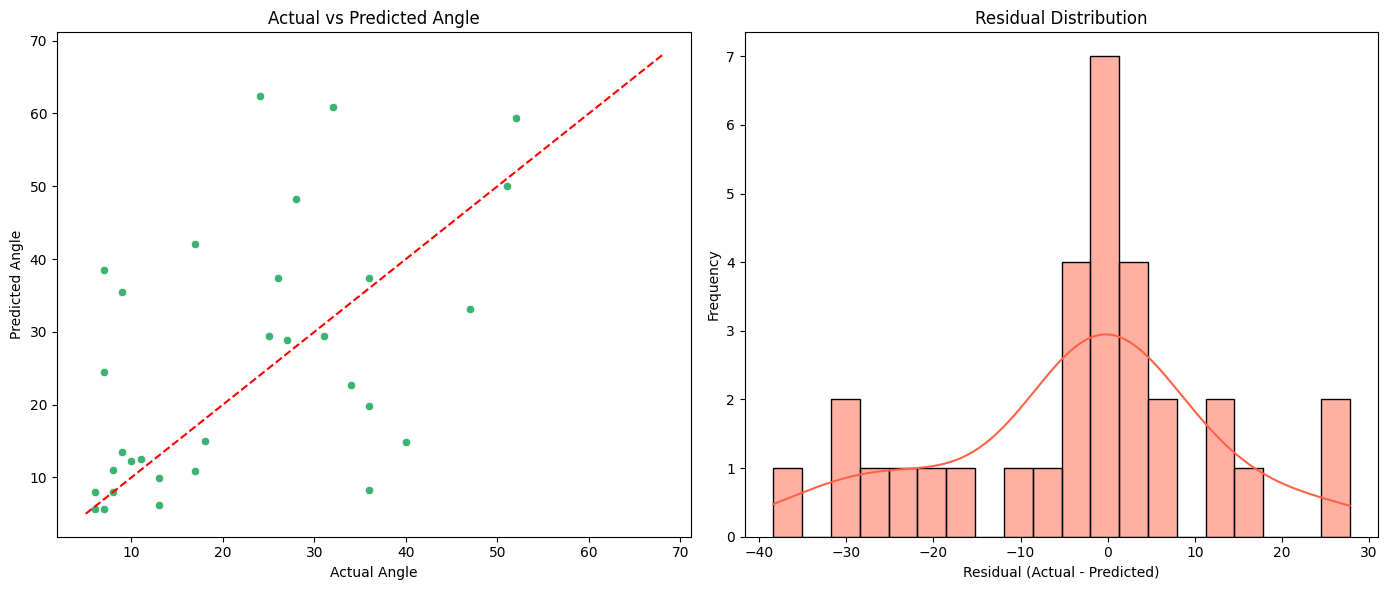

🎯 Predicted Angle for Bandgap Width = 0.1234 → 12.4784


In [32]:
# === Step 7: Plot Actual vs Predicted & Residuals ===
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='mediumseagreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Angle")
plt.ylabel("Predicted Angle")
plt.title("Actual vs Predicted Angle")

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='tomato')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("angle_from_width_only.png")
plt.show()

# === Step 8: Predict from new user input (4-decimal enforcement) ===
def has_four_decimal_places(value):
    """Check if value has exactly 4 decimal places."""
    try:
        as_float = float(value)
        decimal_part = str(as_float).split('.')[-1]
        return len(decimal_part) == 4
    except:
        return False

# === Replace with input() if you want interactive mode ===
bandgap_width_str = "0.1234"  # Example input

# === Validate decimal places ===
if not has_four_decimal_places(bandgap_width_str):
    raise ValueError("Bandgap Width must have **exactly 4 decimal places**!")

# === Prepare input and predict ===
bandgap_width = float(bandgap_width_str)
input_data = np.array([[bandgap_width]])

# Load model and predict
loaded_model = joblib.load('xgb_model_width_only.pkl')
predicted_angle = loaded_model.predict(input_data)

# === Output prediction ===
print(f"🎯 Predicted Angle for Bandgap Width = {bandgap_width:.4f} → {predicted_angle[0]:.4f}")


In [ ]:
import joblib
import numpy as np

# === Function to validate 4 decimal places ===
def has_four_decimal_places(value):
    try:
        float_val = float(value)
        decimal_part = str(float_val).split('.')[-1]
        return len(decimal_part) == 4
    except:
        return False

# === Get user input (optional: make interactive or fixed)
# bandgap_width_str = input("Enter Bandgap Width (must have exactly 4 decimal places): ")
bandgap_width_str = "0.1234"  # ← Replace or set dynamically

# === Validate input format ===
if not has_four_decimal_places(bandgap_width_str):
    raise ValueError("Invalid input: Bandgap Width must have **exactly 4 decimal places** (e.g., 0.1234)")

# === Convert to float and reshape
bandgap_width = float(bandgap_width_str)
input_data = np.array([[bandgap_width]])

# === Load trained model
model = joblib.load('xgb_model_width_only.pkl')

# === Predict
predicted_angle = model.predict(input_data)

# === Output
print("✅ Prediction Successful:")
print(f"   ➤ Input Bandgap Width : {bandgap_width:.4f}")
print(f"   ➤ Predicted Angle      : {predicted_angle[0]:.4f} degrees")


✅ Prediction Successful:
   ➤ Input Bandgap Width : 0.1234
   ➤ Predicted Angle      : 12.4784 degrees
